[View in Colaboratory](https://colab.research.google.com/github/ringochu/Deep-Learning-Experiments/blob/master/TensorFlowCNN_Exercise.ipynb)

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

def lenet(images, keep_prob):
    """
    Args:
        images: a 4-D tensor that holds batched input images
    Return:
        A tensor that contains classification probabilities result, and a dictionary
        of all intermediate tensors.
    """    
    end_points = {}
    end_points['images'] = tf.reshape(images, [-1, 28, 28, 1])

    with tf.variable_scope('conv1'):
        w1 = tf.get_variable('weights', [5, 5, 1, 32])
        b1 = tf.get_variable('biases', [32],
                             initializer=tf.zeros_initializer())
        end_points['conv1'] = tf.nn.relu(
            tf.nn.conv2d(end_points['images'], w1, [1, 1, 1, 1], 'SAME') + b1)
    end_points['pool1'] = tf.nn.max_pool(
        end_points['conv1'], [1, 2, 2, 1], [1, 2, 2, 1], 'SAME')
    
    with tf.variable_scope('conv2'):
        w2 = tf.get_variable('weights', [5, 5, 32, 64])
        b2 = tf.get_variable('biases', [64],
                             initializer=tf.zeros_initializer())
        end_points['conv2'] = tf.nn.relu(
            tf.nn.conv2d(end_points['pool1'], w2, [1, 1, 1, 1], 'SAME') + b2)
    end_points['pool2'] = tf.nn.max_pool(
        end_points['conv2'], [1, 2, 2, 1], [1, 2, 2, 1], 'SAME')
    
    end_points['flatten'] = tf.reshape(end_points['pool2'], [-1, 7 * 7 * 64])
    with tf.variable_scope('fc3'):
        w3 = tf.get_variable('weights', [7 * 7 * 64, 1024])
        b3 = tf.get_variable('biases', [1024],
                             initializer=tf.zeros_initializer())
        end_points['fc3'] = tf.nn.relu(tf.matmul(end_points['flatten'], w3) + b3)
        
    end_points['dropout'] = tf.nn.dropout(end_points['fc3'], keep_prob)
    with tf.variable_scope('fc4'):
        w4 = tf.get_variable('weights', [1024, 10])
        b4 = tf.get_variable('biases', [10],
                             initializer=tf.zeros_initializer())
        end_points['fc4'] = tf.matmul(end_points['fc3'], w4) + b4
    
    return end_points['fc4'], end_points
  
g = tf.Graph()
with g.as_default():
    images = tf.placeholder(tf.float32, shape=[None, 784])
    labels = tf.placeholder(tf.float32, shape=[None, 10])
    keep_prob = tf.placeholder(tf.float32)
    logits, end_points = lenet(images, keep_prob)
    
    # Nodes for training
    loss = tf.nn.softmax_cross_entropy_with_logits_v2(labels=labels, logits=logits)
    train = tf.train.AdadeltaOptimizer(1e-3).minimize(loss)
    
    # accuracy
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(labels, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    saver = tf.train.Saver()
    
    with tf.Session(graph=g) as sess:
        sess.run(tf.global_variables_initializer())

        for i in range(200):
            batch_xs, batch_ys = mnist.train.next_batch(50)
            _, loss_val = sess.run([train, loss],
                                   feed_dict={images: batch_xs,
                                              labels: batch_ys,
                                              keep_prob: 0.5})
        
            if i % 10 == 0:
                print('Loss value of a training batch at step %5d: %f' % (i, np.mean(loss_val)))
            if i % 100 == 0:
                acc = sess.run(accuracy,
                               feed_dict={images: mnist.test.images,
                                          labels: mnist.test.labels,
                                          keep_prob: 1.0})
                print('Accuracy after running %5d steps: %f' % (i, acc))
        
        # save the trained model
        print("Finished Training.")
        saver.save(sess, "mnist_lenet_log/")

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Loss value of a training batch at step     0: 2.323095
Accuracy after running     0 steps: 0.100900
Loss value of a training batch at step    10: 2.318816
Loss value of a training batch at step    20: 2.299373
Loss value of a training batch at step    30: 2.304988
Loss value of a training batch at st


Training
---
Above code shows how a CNN is trained using MNIST images. 

The training process is time consuming it takes up to 10minutes+. Assume we have finished the training process, the trained model is saved as "mnist_lenet_log/", We would like you to plot feature maps from the trained model ("mnist_lenet_log") 
 

---
## Exercise

Below code is the skeleton






INFO:tensorflow:Restoring parameters from mnist_lenet_log/
INFO:tensorflow:Restoring parameters from mnist_lenet_log/
INFO:tensorflow:Restoring parameters from mnist_lenet_log/
INFO:tensorflow:Restoring parameters from mnist_lenet_log/
INFO:tensorflow:Restoring parameters from mnist_lenet_log/
INFO:tensorflow:Restoring parameters from mnist_lenet_log/


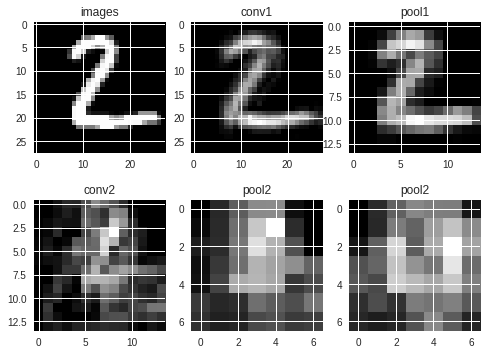

In [3]:
import matplotlib.pyplot as plt

def visualize_tensor(image, key, channel_idx, axis):
    """
    Visualize a tensor in the trained LeNet model.
    Args:
        image: a test image
        key: the key to the tensor in end_points
        channel_idx: index of the channel to be visualized
        axis: a pyplot Axis object
    """
    g = tf.Graph()
    with g.as_default():
        images = tf.placeholder(tf.float32, shape=[None, 784])
        labels = tf.placeholder(tf.float32, shape=[None, 10])
        keep_prob = tf.placeholder(tf.float32)
        logits, end_points = lenet(images, keep_prob)

        # Nodes for training
        loss = tf.nn.softmax_cross_entropy_with_logits_v2(labels=labels, logits=logits)
        train = tf.train.AdadeltaOptimizer(1e-3).minimize(loss)

        # accuracy
        correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(labels, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

        saver = tf.train.Saver()
        with tf.Session(graph=g) as sess:
            saver.restore(sess, 'mnist_lenet_log/')   #""""""------""""""
            
            # TODO: finish the line to get the tensor value of end_points[key]
            tensor_val = sess.run(end_points[key], feed_dict={images: [image], keep_prob: 1.0})
            
            # TODO: get the 2D image at channel "channel_idx"
            image_2d = tensor_val[0, :, :, channel_idx]
            
            # TODO: visualize
            axis.set_title(key)
            axis.imshow(image_2d, cmap='gray')   

#
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(8, 6))
visualize_tensor(mnist.test.images[1], 'images', 0, ax[0, 0])
visualize_tensor(mnist.test.images[1], 'conv1', 0, ax[0, 1])
visualize_tensor(mnist.test.images[1], 'pool1', 0, ax[0, 2])
visualize_tensor(mnist.test.images[1], 'conv2', 0, ax[1, 0])
visualize_tensor(mnist.test.images[1], 'pool2', 0, ax[1, 1])
visualize_tensor(mnist.test.images[10], 'pool2', 0, ax[1, 2])